<a href="https://colab.research.google.com/github/sandushiw98/Early-Detection-of-Dysgraphia-in-Sinhala-Speaking-Children-Using-Multi-Modal-Machine-Learning/blob/main/Dysgraphia_clinical_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Research_Dysgraphia/ANN-Orginal.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 232 entries, Child ID to severity
dtypes: float64(229), object(3)
memory usage: 112.5+ KB


,Child ID,Age,Weight(Kg),OFC(cm),Height(cm),Poor school performance,Recent Deterioration,Lack of interest in studies,Inattension to school work,Difficulties in social /emotional reciprocity,...,Self-care_Unsatisfactory,Home-living_Satisafactory,Home-living_Unsatisfactory,Social-skills_Satisafactory,Social-skills_Unsatisfactory,Safety_Satisafactory,Safety_Unsatisfactory,Leisure Activites_Satisafactory,Leisure Activites_Unsatisfactory,severity
0,1.0,7.0,20.0,49.0,121.5,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.00
1,2.0,7.0,22.0,50.0,125.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.00
2,3.0,8.0,15.0,50.0,114.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.25
3,4.0,6.0,14.0,51.0,98.5,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.50
4,5.0,6.0,19.5,48.0,115.5,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.60


In [4]:
# Columns to impute with mean
mean_impute_cols = [
    'Age',
    'Weight',
    'OFC',
    'Height',
    'Birth Weight'
]

# Impute with mean where applicable
for col in mean_impute_cols:
    if col in data.columns:  # Check if the column exists in the DataFrame
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)

# Impute rest of the columns with mode value
for col in data.columns:
    if col not in mean_impute_cols:  # Only apply to columns not in the mean_impute_cols
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)

<ipython-input-4-477260d539c2>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)
<ipython-input-4-477260d539c2>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [5]:
import pandas as pd

# Set options to display more rows and/or columns
pd.set_option('display.max_columns', None)  # None means show all columns
pd.set_option('display.max_rows', 100)      # Adjust number of rows to display

# Now print the DataFrame
print(data)

    Child ID        Age  Weight(Kg)  OFC(cm)  Height(cm)  \
0        1.0   7.000000       20.00     49.0       121.5   
1        2.0   7.000000       22.00     50.0       125.5   
2        3.0   8.000000       15.00     50.0       114.0   
3        4.0   6.000000       14.00     51.0        98.5   
4        5.0   6.000000       19.50     48.0       115.5   
5        6.0   7.000000       20.00     50.0       121.5   
6        7.0   7.000000       20.00     49.0       122.0   
7        8.0   6.000000       16.00     50.0       111.0   
8        9.0   7.000000       21.50     50.5       118.0   
9       10.0   7.000000       20.00     51.0       115.5   
10      11.0   7.000000       18.00     49.0       115.5   
11      12.0   8.000000       16.00     50.0       118.5   
12      13.0   7.000000       30.50     52.8       127.2   
13      14.0   7.000000       16.00     49.5       112.5   
14      15.0   7.000000       20.00     48.5       121.5   
15      16.0   8.000000       22.00     

In [6]:
import pandas as pd
import numpy as np
import random

# Debugging print to check input data type
print(data['Monthly Income'].apply(type))

def calculate_average(income_range):
    income_range = income_range.replace(',', '')  # Remove commas first
    low, high = income_range.split('-')
    return (int(low.strip()) + int(high.strip())) / 2

def impute_monthly_income(value):
    value = str(value).strip()  # Convert to string and remove spaces
    print(f"Processing value: {value}")  # Debugging print to track values
    if '-' in value:
        return calculate_average(value)
    elif '>' in value:
        # Ensure no spaces between '>' and the number
        return random.randint(50001, 100000)  # Generate a random value greater than 50,000
    elif value.lower() == 'n/a':
        return np.nan  # Convert 'N/A' to NaN
    else:
        return np.nan  # Return NaN for any other non-numeric or unhandled format


# Apply the imputation function to the 'Monthly Income' column
data['Monthly Income'] = data['Monthly Income'].apply(impute_monthly_income)

# Display the first few rows of the data to check
data.head()


# Replace 'N/A' values with the mode of the column
mode_value = data['Monthly Income'].dropna().mode()[0]  # Calculate mode excluding NaN
data['Monthly Income'].fillna(mode_value, inplace=True)


# Show the modified DataFrame
print(data.head())  # Display the first few rows to verify changes


0     <class 'str'>
1     <class 'str'>
2     <class 'str'>
3     <class 'str'>
4     <class 'str'>
5     <class 'str'>
6     <class 'str'>
7     <class 'str'>
8     <class 'str'>
9     <class 'str'>
10    <class 'str'>
11    <class 'str'>
12    <class 'str'>
13    <class 'str'>
14    <class 'str'>
15    <class 'str'>
16    <class 'str'>
17    <class 'str'>
18    <class 'str'>
19    <class 'str'>
20    <class 'str'>
21    <class 'str'>
22    <class 'str'>
23    <class 'str'>
24    <class 'str'>
25    <class 'str'>
26    <class 'str'>
27    <class 'str'>
28    <class 'str'>
29    <class 'str'>
30    <class 'str'>
31    <class 'str'>
32    <class 'str'>
33    <class 'str'>
34    <class 'str'>
35    <class 'str'>
36    <class 'str'>
37    <class 'str'>
38    <class 'str'>
39    <class 'str'>
40    <class 'str'>
41    <class 'str'>
42    <class 'str'>
43    <class 'str'>
44    <class 'str'>
45    <class 'str'>
46    <class 'str'>
47    <class 'str'>
48    <class 'str'>
49    <class 'str'>


<ipython-input-6-8c50e5ddf313>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Monthly Income'].fillna(mode_value, inplace=True)


In [7]:
import pandas as pd

# Define the mapping for the 'Mother' and 'Father' columns

education_mapping = {
    'Graduate': 1,
    'A/L': 2,
    'O/L': 3,
    'Primary to O/L': 4,
    'Primary': 5
}

# Apply the mappings

data['Education_Mother'] = data['Education_Mother'].map(education_mapping)
data['Education_Father'] = data['Education_Father'].map(education_mapping)


print(data.head())



   Child ID  Age  Weight(Kg)  OFC(cm)  Height(cm)  Poor school performance   \
0       1.0  7.0        20.0     49.0       121.5                       1.0   
1       2.0  7.0        22.0     50.0       125.5                       1.0   
2       3.0  8.0        15.0     50.0       114.0                       1.0   
3       4.0  6.0        14.0     51.0        98.5                       1.0   
4       5.0  6.0        19.5     48.0       115.5                       1.0   

   Recent Deterioration  Lack of interest in studies  \
0                   0.0                          0.0   
1                   1.0                          1.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   1.0                          0.0   

   Inattension to school work  Difficulties in social /emotional reciprocity  \
0                         1.0                                            0.0   
1                         1.

In [8]:
import pandas as pd


# Define the weighted values for each feature

eye_contact_mapping = {
    'Eye Contact-Good': 1,
    'Eye Contact_Fair': 2,
    'Eye Contact_Poor': 3
}
gait_mapping = {
    'Gait_Stable': 1,
    'Gait_Ataxia': 2,
    'Gait_Wide based': 3
}

activity_level_mapping = {
    'Activity Level_Noraml': 1,
    'Activity Level_Overactive': 2,
    'Activity Level_Impulsive': 3
}
attention_mapping = {
    'Attention_Inact ': 1,
    'Attention_Limited': 2,
    'Attention_Impaired': 3
}
behaviour_mapping = {
    'Behaviour_Normal': 1,
    'Behaviour_Uncooperative': 2,
    'Behaviour_Anxious': 3,
    'Behaviour_Disorganized': 4
}
speech_mapping = {
    'Speech_Normal': 1,
    'Speech_Slow': 3,
    'Speech_Fast': 2,
    'Speech_Disfluent': 4,
    'Speech_Mute': 5,
    'Speech_Stammering': 6,
    'Speech_Prominal Reversal': 7
}

# Merge and map the columns
data['Eye Contact'] = data[['Eye Contact-Good', 'Eye Contact_Fair', 'Eye Contact_Poor']].idxmax(axis=1).map(eye_contact_mapping)
data['Gait'] = data[['Gait_Stable', 'Gait_Ataxia', 'Gait_Wide based']].idxmax(axis=1).map(gait_mapping)
data['Activity Level'] = data[['Activity Level_Noraml', 'Activity Level_Overactive', 'Activity Level_Impulsive']].idxmax(axis=1).map(activity_level_mapping)
data['Attention'] = data[['Attention_Inact ', 'Attention_Limited', 'Attention_Impaired']].idxmax(axis=1).map(attention_mapping)
data['Behaviour'] = data[['Behaviour_Normal', 'Behaviour_Uncooperative', 'Behaviour_Anxious', 'Behaviour_Disorganized']].idxmax(axis=1).map(behaviour_mapping)
data['Speech'] = data[['Speech_Normal', 'Speech_Slow', 'Speech_Fast', 'Speech_Disfluent', 'Speech_Mute', 'Speech_Stammering', 'Speech_Prominal Reversal']].idxmax(axis=1).map(speech_mapping)

# Drop the original columns if no longer needed
columns_to_drop = ['Eye Contact-Good', 'Eye Contact_Fair', 'Eye Contact_Poor', 'Gait_Stable', 'Gait_Ataxia', 'Gait_Wide based', 'Activity Level_Noraml', 'Activity Level_Overactive', 'Activity Level_Impulsive', 'Attention_Inact ', 'Attention_Limited', 'Attention_Impaired', 'Behaviour_Normal', 'Behaviour_Uncooperative', 'Behaviour_Anxious', 'Behaviour_Disorganized', 'Speech_Normal', 'Speech_Slow', 'Speech_Fast', 'Speech_Disfluent', 'Speech_Mute', 'Speech_Stammering', 'Speech_Prominal Reversal']
data.drop(columns=columns_to_drop, inplace=True)

# Ensure severity is the last column
severity = data.pop('severity')
data['severity'] = severity

print(data.head())





   Child ID  Age  Weight(Kg)  OFC(cm)  Height(cm)  Poor school performance   \
0       1.0  7.0        20.0     49.0       121.5                       1.0   
1       2.0  7.0        22.0     50.0       125.5                       1.0   
2       3.0  8.0        15.0     50.0       114.0                       1.0   
3       4.0  6.0        14.0     51.0        98.5                       1.0   
4       5.0  6.0        19.5     48.0       115.5                       1.0   

   Recent Deterioration  Lack of interest in studies  \
0                   0.0                          0.0   
1                   1.0                          1.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   1.0                          0.0   

   Inattension to school work  Difficulties in social /emotional reciprocity  \
0                         1.0                                            0.0   
1                         1.

In [9]:
import pandas as pd

# Define the weighted values for each feature
expressive_language_mapping = {
    'Expressive Language_Appropirate': 1,
    'Expressive Language_Immature use of language': 2,
    'Expressive Language_Primarily uses gestures': 3
}


reading_mapping = {
    'Reading_Above Average': 1,
    'Reading_Average': 3,
    'Reading_Below Average': 5
}

writing_mapping = {
    'Writing_Above Average': 1,
    'Writing_Average': 3,
    'Writing_Below Average': 5
}

mathematics_mapping = {
    'Mathematics_Above Average': 1,
    'Mathematics_Average': 3,
    'Mathematics_Below Average': 5
}

# Functional skills mappings
feeding_mapping = {
    'Feeding_Independent': 1,
    'Feeding_Needs support': 2,
    'Feeding_Dependent': 3
}

bathing_mapping = {
    'Bathing_Independent': 1,
    'Bathing_Needs support': 2,
    'Bathing_Dependent': 3
}

mobility_mapping = {
    'Mobility_Independent': 1,
    'Mobility_Needs support': 2,
    'Mobility_Dependent': 3
}

dressing_mapping = {
    'Dressing_Independent': 1,
    'Dressing_Needs support': 2,
    'Dressing_Dependent': 3
}

continence_mapping = {
    'Continence_Independent': 1,
    'Continence_Needs support': 2,
    'Continence_Dependent': 3
}

# Other Skills mappings
self_care_mapping = {
    'Self-care_Satisafactory': 1,
    'Self-care_Unsatisfactory': 2
}

home_living_mapping = {
    'Home-living_Satisafactory': 1,
    'Home-living_Unsatisfactory': 2
}

social_skills_mapping = {
    'Social-skills_Satisafactory': 1,
    'Social-skills_Unsatisfactory': 2
}

safety_mapping = {
    'Safety_Satisafactory': 1,
    'Safety_Unsatisfactory': 2
}

leisure_activities_mapping = {
    'Leisure Activites_Satisafactory': 1,
    'Leisure Activites_Unsatisfactory': 2
}

# Assuming your data DataFrame contains all these columns, the below code merges and maps them

# Mapping Expressive Language, IQ, Reading, Writing, Mathematics and others
data['Expressive Language'] = data[['Expressive Language_Appropirate', 'Expressive Language_Immature use of language', 'Expressive Language_Primarily uses gestures']].idxmax(axis=1).map(expressive_language_mapping)
data['Reading'] = data[['Reading_Above Average', 'Reading_Average', 'Reading_Below Average']].idxmax(axis=1).map(reading_mapping)
data['Writing'] = data[['Writing_Above Average', 'Writing_Average', 'Writing_Below Average']].idxmax(axis=1).map(writing_mapping)
data['Mathematics'] = data[['Mathematics_Above Average', 'Mathematics_Average', 'Mathematics_Below Average']].idxmax(axis=1).map(mathematics_mapping)

# Mapping functional skills
data['Feeding'] = data[['Feeding_Independent', 'Feeding_Needs support', 'Feeding_Dependent']].idxmax(axis=1).map(feeding_mapping)
data['Bathing'] = data[['Bathing_Independent', 'Bathing_Needs support', 'Bathing_Dependent']].idxmax(axis=1).map(bathing_mapping)
data['Mobility'] = data[['Mobility_Independent', 'Mobility_Needs support', 'Mobility_Dependent']].idxmax(axis=1).map(mobility_mapping)
data['Dressing'] = data[['Dressing_Independent', 'Dressing_Needs support', 'Dressing_Dependent']].idxmax(axis=1).map(dressing_mapping)
data['Continence'] = data[['Continence_Independent', 'Continence_Needs support', 'Continence_Dependent']].idxmax(axis=1).map(continence_mapping)

# Mapping other skills
data['Self-care'] = data[['Self-care_Satisafactory', 'Self-care_Unsatisfactory']].idxmax(axis=1).map(self_care_mapping)
data['Home-living'] = data[['Home-living_Satisafactory', 'Home-living_Unsatisfactory']].idxmax(axis=1).map(home_living_mapping)
data['Social-skills'] = data[['Social-skills_Satisafactory', 'Social-skills_Unsatisfactory']].idxmax(axis=1).map(social_skills_mapping)
data['Safety'] = data[['Safety_Satisafactory', 'Safety_Unsatisfactory']].idxmax(axis=1).map(safety_mapping)
data['Leisure Activites'] = data[['Leisure Activites_Satisafactory','Leisure Activites_Unsatisfactory']].idxmax(axis=1).map(leisure_activities_mapping)

# Drop the original columns if no longer needed
columns_to_drop = ['Expressive Language_Appropirate', 'Expressive Language_Immature use of language', 'Expressive Language_Primarily uses gestures',
                   'Reading_Above Average', 'Reading_Average', 'Reading_Below Average',
                   'Writing_Above Average', 'Writing_Average', 'Writing_Below Average',
                   'Mathematics_Above Average', 'Mathematics_Average', 'Mathematics_Below Average',
                   'Feeding_Independent', 'Feeding_Needs support', 'Feeding_Dependent',
                   'Bathing_Independent', 'Bathing_Needs support', 'Bathing_Dependent',
                   'Mobility_Independent', 'Mobility_Needs support', 'Mobility_Dependent',
                   'Dressing_Independent', 'Dressing_Needs support', 'Dressing_Dependent',
                   'Continence_Independent', 'Continence_Needs support', 'Continence_Dependent',
                   'Self-care_Satisafactory', 'Self-care_Unsatisfactory',
                   'Home-living_Satisafactory', 'Home-living_Unsatisfactory',
                   'Social-skills_Satisafactory', 'Social-skills_Unsatisfactory',
                   'Safety_Satisafactory', 'Safety_Unsatisfactory','Leisure Activites_Satisafactory','Leisure Activites_Unsatisfactory'
]


data.drop(columns=columns_to_drop, inplace=True)

# Ensure severity is the last column
severity = data.pop('severity')
data['severity'] = severity

print(data.info())
print(data.head())

# Save the modified DataFrame
data.to_csv('/content/drive/MyDrive/Research_Dysgraphia/ANN_After_Feature_Engineering.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 191 entries, Child ID to severity
dtypes: float64(169), int64(22)
memory usage: 92.6 KB
None
   Child ID  Age  Weight(Kg)  OFC(cm)  Height(cm)  Poor school performance   \
0       1.0  7.0        20.0     49.0       121.5                       1.0   
1       2.0  7.0        22.0     50.0       125.5                       1.0   
2       3.0  8.0        15.0     50.0       114.0                       1.0   
3       4.0  6.0        14.0     51.0        98.5                       1.0   
4       5.0  6.0        19.5     48.0       115.5                       1.0   

   Recent Deterioration  Lack of interest in studies  \
0                   0.0                          0.0   
1                   1.0                          1.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   1.0                          0.0   

   Inattension t

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_After_Feature_Engineering.csv'
data = pd.read_csv(file_path)


# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (excluding 'Child ID' and already binary columns)
columns_to_scale = data.columns.drop('Child ID')  # Adjust this to exclude any other non-continuous columns

# Identify columns that are not already 0 or 1
columns_to_scale = [col for col in columns_to_scale if not all(data[col].isin([0, 1]))]

# Apply the scaler to these columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Round the scaled data to two decimal places
data[columns_to_scale] = data[columns_to_scale].round(2)

# Save the normalized and rounded data
normalized_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv'
data.to_csv(normalized_file_path, index=False)

print(f"Normalized data saved to {normalized_file_path}")


Normalized data saved to /content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv


Loading data from /content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv
Data loaded successfully. Data shape: (62, 191)
Dropping 'Child ID' column
'Child ID' column dropped. Data shape: (62, 190)
Calculating correlation matrix
Correlation matrix calculated successfully
Extracting correlation with 'Severity'
Correlation with 'Severity' extracted. Shape: (190, 1)
Total features: 190, Features per batch: 20
Processing batch 1 with features 0 to 19
Displaying heatmap for batch 1


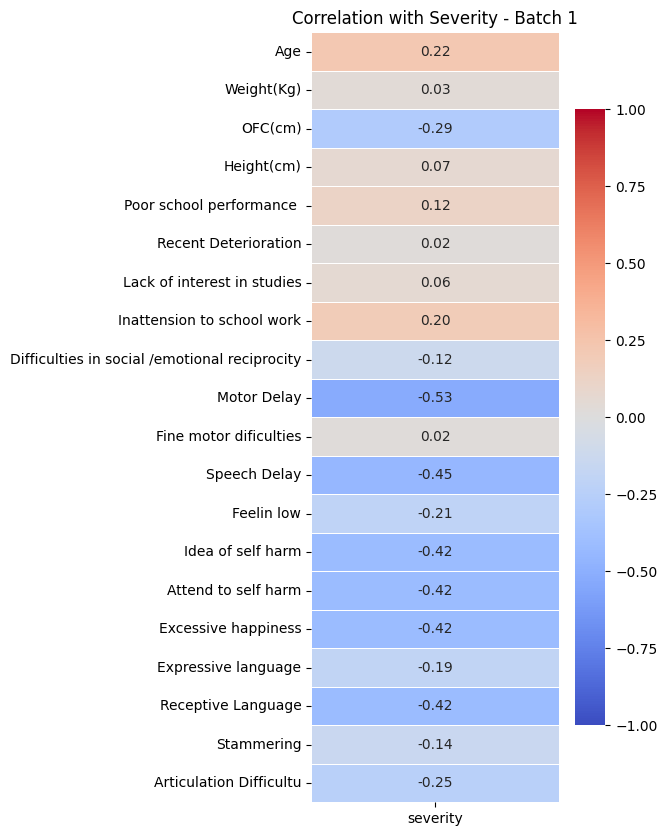

Processing batch 2 with features 20 to 39
Displaying heatmap for batch 2


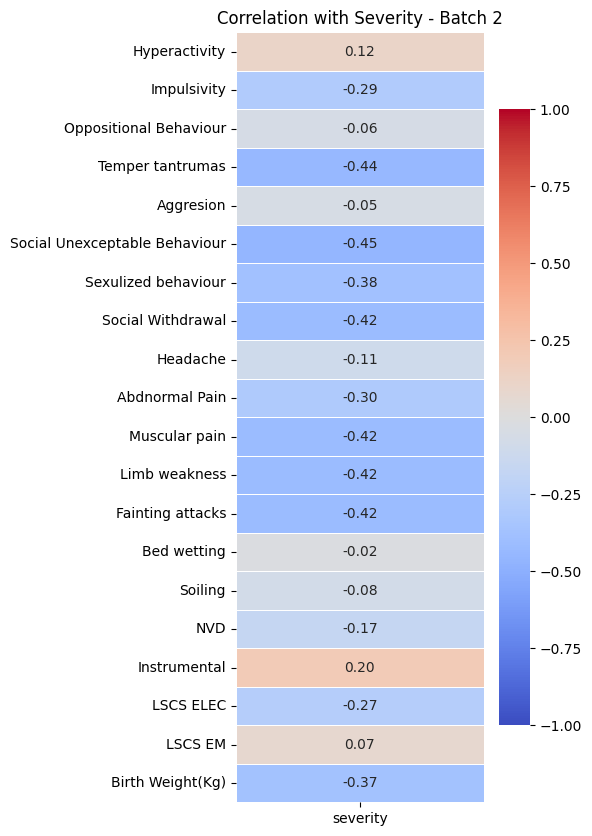

Processing batch 3 with features 40 to 59
Displaying heatmap for batch 3


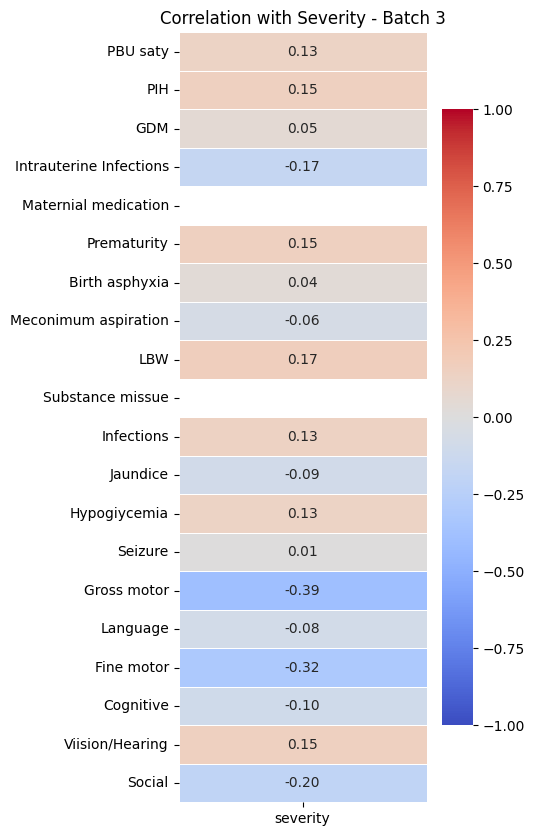

Processing batch 4 with features 60 to 79
Displaying heatmap for batch 4


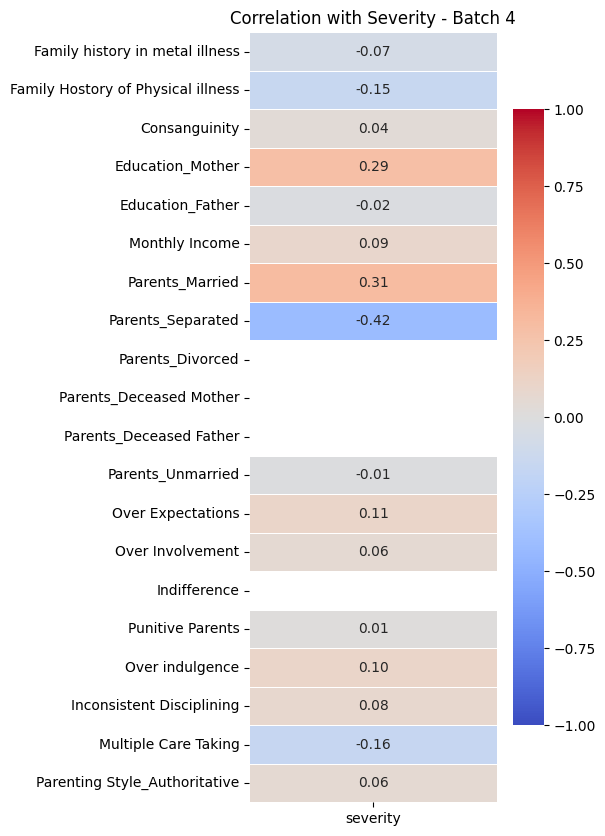

Processing batch 5 with features 80 to 99
Displaying heatmap for batch 5


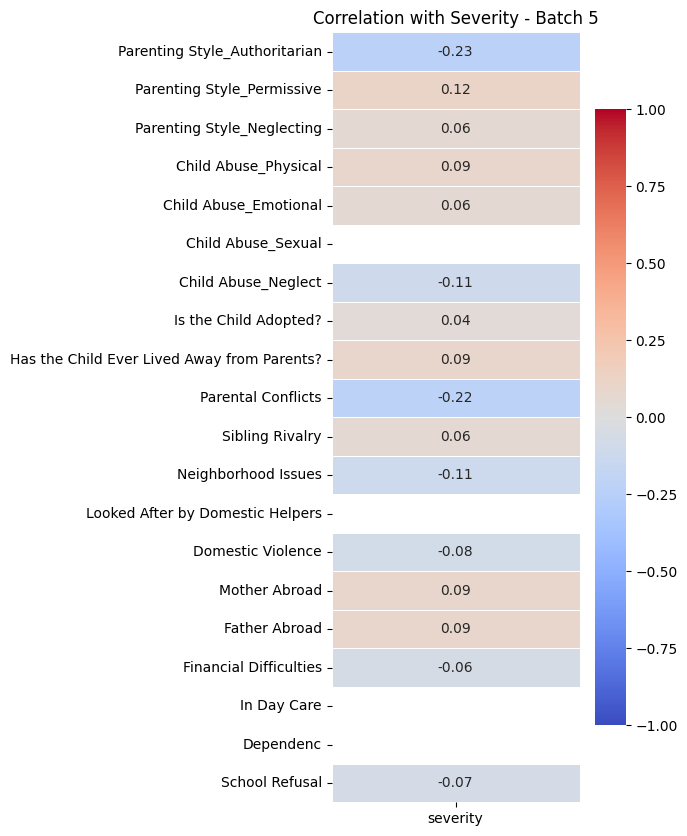

Processing batch 6 with features 100 to 119
Displaying heatmap for batch 6


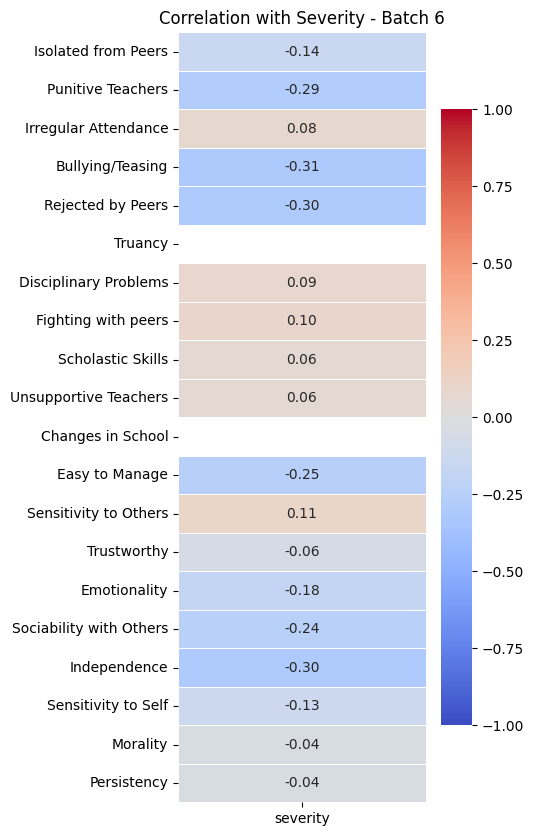

Processing batch 7 with features 120 to 139
Displaying heatmap for batch 7


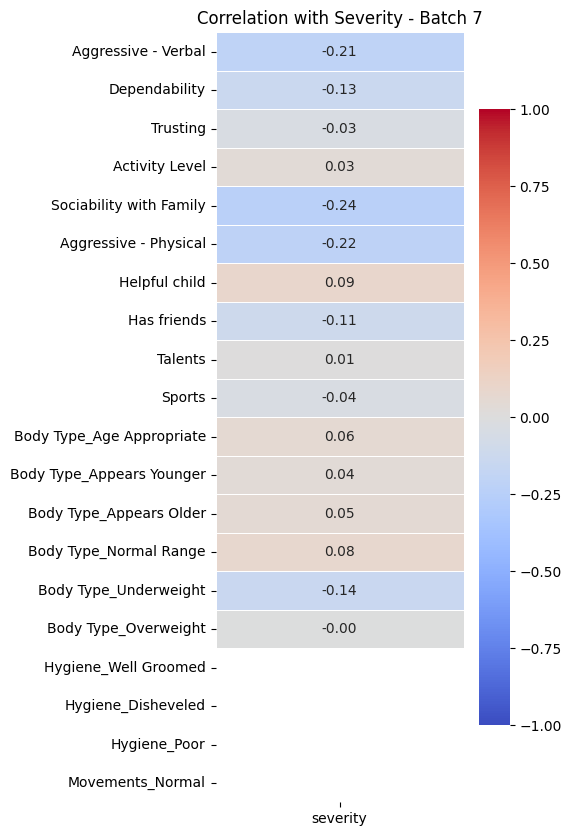

Processing batch 8 with features 140 to 159
Displaying heatmap for batch 8


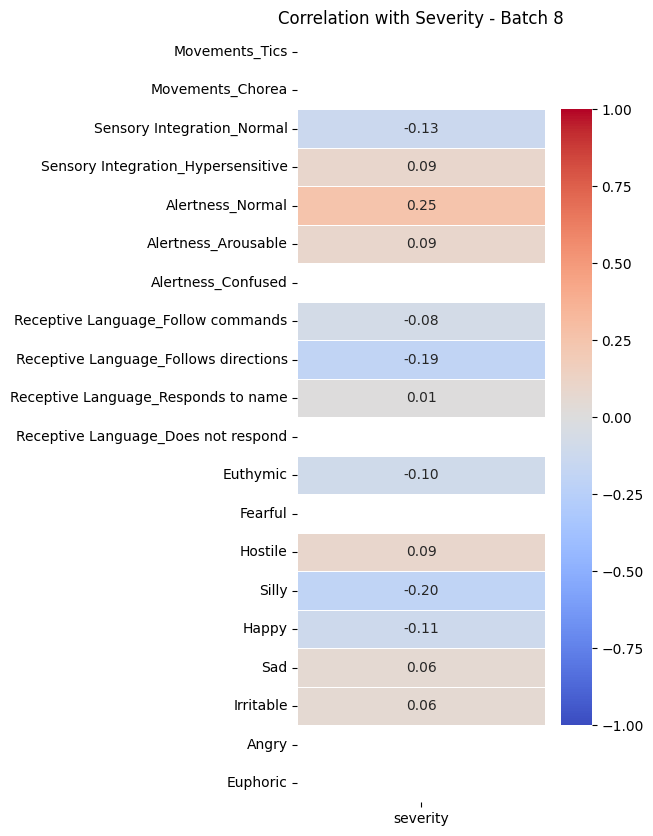

Processing batch 9 with features 160 to 179
Displaying heatmap for batch 9


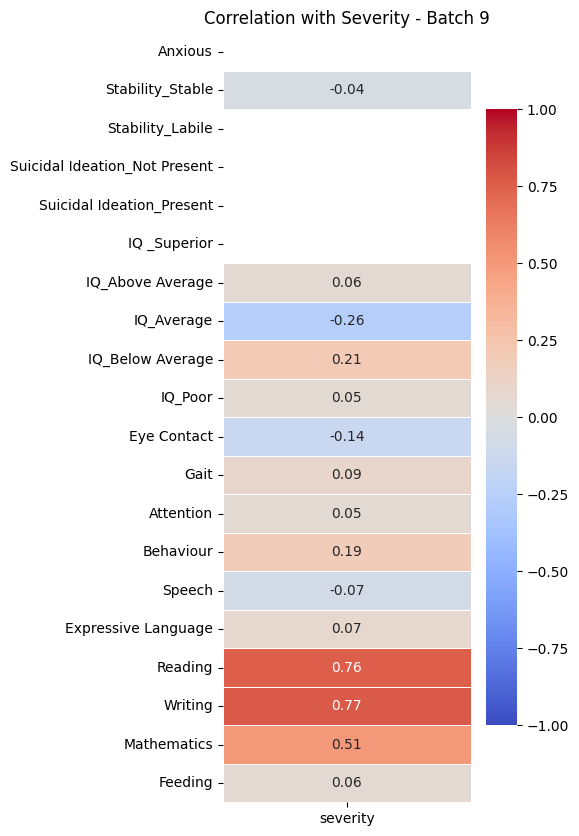

Processing batch 10 with features 180 to 189
Displaying heatmap for batch 10


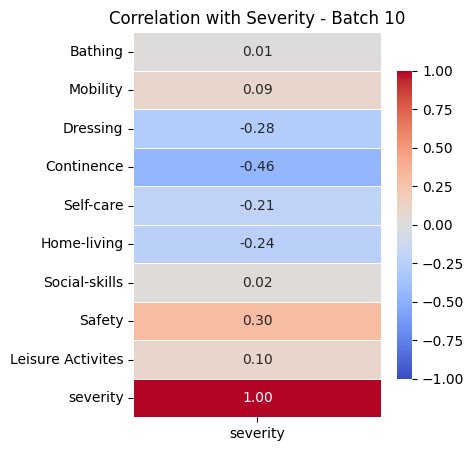

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized data
normalized_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv'
print(f"Loading data from {normalized_file_path}")
data = pd.read_csv(normalized_file_path)
print("Data loaded successfully. Data shape:", data.shape)

# Drop the 'Child ID' column as it is not relevant for the correlation analysis
print("Dropping 'Child ID' column")
data = data.drop('Child ID', axis=1)
print("'Child ID' column dropped. Data shape:", data.shape)

# Calculate the correlation matrix
print("Calculating correlation matrix")
corr_matrix = data.corr()
#spearman_corr = data.corr(method='spearman')
print("Correlation matrix calculated successfully")

# Extract correlation with 'Severity' specifically
print("Extracting correlation with 'Severity'")
severity_corr = corr_matrix[['severity']]
print("Correlation with 'Severity' extracted. Shape:", severity_corr.shape)

# Split the features into batches of 20 for better visualization
num_features = len(severity_corr)
features_per_batch = 20
print(f"Total features: {num_features}, Features per batch: {features_per_batch}")

# Loop through the features in batches of 20
for i in range(0, num_features, features_per_batch):
    batch = severity_corr.iloc[i:i + features_per_batch]
    print(f"Processing batch {i // features_per_batch + 1} with features {i} to {i + len(batch) - 1}")

    # Set up the matplotlib figure
    plt.figure(figsize=(4, len(batch) * 0.5))  # Adjust the figure size to fit the batch size

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(batch, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
                square=False, linewidths=.5, cbar_kws={"shrink": .8})

    # Adjust the plot to make sure all is visible
    plt.xticks(rotation=0)
    plt.yticks(rotation=0, ha='right')
    plt.title(f'Correlation with Severity - Batch {i // features_per_batch + 1}')

    # Show the plot
    print(f"Displaying heatmap for batch {i // features_per_batch + 1}")
    plt.show()

In [12]:
import pandas as pd
import numpy as np

# Load the data from the specified path
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_Feature Selection.csv'
data = pd.read_csv(file_path)

# Convert 'severity' to categorical bins
bins = [-np.inf, 0.75, np.inf]
labels = ['Low', 'High']
data['severity'] = pd.cut(data['severity'], bins=bins, labels=labels, right=True)

# Save the modified data to the specified path
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data.to_csv(modified_file_path, index=False)

print("Data processing completed and saved to:", modified_file_path)



Data processing completed and saved to: /content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the modified data from the specified path
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(modified_file_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the training and testing datasets to specified paths
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

print("Data split completed and saved to:")
print("Training data:", train_file_path)
print("Testing data:", test_file_path)


Data split completed and saved to:
Training data: /content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv
Testing data: /content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv


# Random Forest

# Random Forest-SMOTE during cross-validation

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, log_loss
from imblearn.pipeline import Pipeline
import numpy as np
import joblib

# Load the training data from the specified path
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
data = pd.read_csv(train_file_path)

# Assume the last column is the target variable, and the rest are features
X_train_full = data.iloc[:, :-1]  # Features
y_train_full = data.iloc[:, -1]   # Target

# Initialize Stratified K-Fold Cross Validator
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define parameter grid for RandomizedSearchCV for RandomForest
param_dist_rf = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20, 30, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None],
    'model__class_weight': [None, 'balanced', 'balanced_subsample']
}

# Alternative model parameter grid for Gradient Boosting
param_dist_gb = {
    'model__n_estimators': [100, 200, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__min_samples_split': [2, 5, 10]
}

# Initialize lists to store fold-wise metrics
fold_var = 1
train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []
classification_reports = []
pipelines = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation with hyperparameter tuning
for train_index, val_index in kf.split(X_train_full, y_train_full):
    print(f"\nFold {fold_var}")
    # Split the data
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    # Define the pipeline steps
    pipeline_steps = [
        ('scaler', RobustScaler()),  # Using RobustScaler instead of StandardScaler
        # ('pca', PCA(n_components=0.90)),  # Optionally include PCA
        ('model', RandomForestClassifier(random_state=42))
    ]

    # Define the pipeline
    pipeline = Pipeline(pipeline_steps)

    # Set up RandomizedSearchCV with expanded parameter grid
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist_rf,
        scoring='roc_auc',  # Using ROC AUC for imbalanced classes
        n_iter=20,  # Increased number of parameter settings
        cv=3,  # Inner cross-validation for hyperparameter tuning
        n_jobs=-1,
        random_state=42
    )

    # Apply SMOTE to the training data within the pipeline
    smote = SMOTE(random_state=42, sampling_strategy='auto')  # Try 'auto' or adjust as needed
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train the model with hyperparameter tuning
    random_search.fit(X_train_resampled, y_train_resampled)
    best_pipeline = random_search.best_estimator_

    # Make predictions on the validation set
    y_val_pred = best_pipeline.predict(X_val)
    y_val_prob = best_pipeline.predict_proba(X_val)[:, 1]

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_val, y_val_prob)
    roc_auc_scores.append(roc_auc)

    # Generate classification report
    report = classification_report(y_val, y_val_pred)
    classification_reports.append(report)

    # Calculate log loss on the training set
    y_train_prob = best_pipeline.predict_proba(X_train_resampled)[:, 1]
    train_loss = log_loss(y_train_resampled, y_train_prob)
    train_losses.append(train_loss)

    # Calculate log loss on the validation set
    val_loss = log_loss(y_val, y_val_prob)
    val_losses.append(val_loss)

    # Calculate training accuracy
    y_train_pred = best_pipeline.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Save the pipeline (scaler, and best model)
    joblib.dump(best_pipeline, f'/content/drive/MyDrive/Research_Dysgraphia/rf_pipeline_fold{fold_var}.pkl')
    pipelines.append(best_pipeline)

    # Display fold-wise metrics
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    print(f"ROC AUC Score: {roc_auc}")
    print("Classification Report:\n", report)
    print(f"Training Loss (Log Loss): {train_loss}, Validation Loss (Log Loss): {val_loss}")

    # Increment the fold counter
    fold_var += 1

# Identify the fold with the highest ROC AUC score
best_fold_index = np.argmax(roc_auc_scores)
best_roc_auc = roc_auc_scores[best_fold_index]
best_classification_report = classification_reports[best_fold_index]
best_pipeline = pipelines[best_fold_index]

print(f"\nBest Fold: Fold {best_fold_index + 1} with ROC AUC Score: {best_roc_auc}")
print("Classification Report for Best Fold:\n", best_classification_report)

# Optionally, save the best pipeline
joblib.dump(best_pipeline, '/content/drive/MyDrive/Research_Dysgraphia/rf_best_pipeline.pkl')



Fold 1


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 10, 'model__class_weight': None}
Training Accuracy: 0.9827586206896551, Validation Accuracy: 0.8
ROC AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Training Loss (Log Loss): 0.1869155515921176, Validation Loss (Log Loss): 0.4548307203458896

Fold 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 50, 'model__class_weight': 'balanced'}
Training Accuracy: 0.9827586206896551, Validation Accuracy: 0.8
ROC AUC Score: 0.5
Classification Report:
               precision    recall  f1-score   support

        High       0.80      1.00      0.89         4
         Low       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Training Loss (Log Loss): 0.1742241662134108, Validation Loss (Log Loss): 0.47028632202497656

Fold 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 10, 'model__class_weight': None}
Training Accuracy: 1.0, Validation Accuracy: 0.8
ROC AUC Score: 0.25
Classification Report:
               precision    recall  f1-score   support

        High       0.80      1.00      0.89         4
         Low       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Training Loss (Log Loss): 0.10996000089228627, Validation Loss (Log Loss): 0.8600696982306237

Fold 4
Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30, 'model__class_weight': None}
Training Accuracy: 1.0, Validation Accuracy: 0.6
ROC AUC Score: 0.8333333333333334
Classification 

['/content/drive/MyDrive/Research_Dysgraphia/rf_best_pipeline.pkl']

In [15]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load testing dataset
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'
test_data = pd.read_csv(test_file_path)

# Assume the last column is the target variable, and the rest are features
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Load the trained pipeline (Random Forest version)
# Ensure you're loading the correct pipeline file that includes both the scaler and the model
pipeline = joblib.load('/content/drive/MyDrive/Research_Dysgraphia/rf_pipeline_fold1.pkl')

# Make predictions on the testing set using the loaded pipeline
y_test_pred = pipeline.predict(X_test)

# Evaluate the model on the testing set
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

# Optionally, save the predictions along with the test data
test_data['Prediction'] = y_test_pred
predictions_csv_path = '/content/drive/MyDrive/Research_Dysgraphia/rf_test_predictions.csv'
test_data.to_csv(predictions_csv_path, index=False)
print(f"\nPredictions saved to {predictions_csv_path}")


Accuracy on Test Set: 0.6153846153846154
Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.80      0.73      0.76        11
         Low       0.00      0.00      0.00         2

    accuracy                           0.62        13
   macro avg       0.40      0.36      0.38        13
weighted avg       0.68      0.62      0.64        13


Predictions saved to /content/drive/MyDrive/Research_Dysgraphia/rf_test_predictions.csv


# SVM

# SMOTE During the cross validation

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, hinge_loss
from imblearn.pipeline import Pipeline
import numpy as np
import joblib

# Load the training data from the specified path
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
data = pd.read_csv(train_file_path)

# Assume the last column is the target variable, and the rest are features
X_train_full = data.iloc[:, :-1]  # Features
y_train_full = data.iloc[:, -1]   # Target

# Initialize Stratified K-Fold Cross Validator with more splits
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define an expanded parameter grid for RandomizedSearchCV
param_dist = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 1000],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],
    'degree': [2, 3, 4, 5],  # Degree for polynomial kernel
    'class_weight': [None, 'balanced']
}

# Initialize lists to store fold-wise metrics
fold_var = 1
train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []
classification_reports = []
pipelines = []

# Perform K-Fold Cross-Validation with hyperparameter tuning
for train_index, val_index in kf.split(X_train_full, y_train_full):
    print(f"\nFold {fold_var}")
    # Split the data
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    # Scale the features before applying SMOTE
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Apply SMOTE only to the scaled training data
    smote = SMOTE(random_state=42, sampling_strategy=0.6)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Apply PCA for dimensionality reduction (optional)
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_resampled = pca.fit_transform(X_train_resampled)
    X_val_scaled = pca.transform(X_val_scaled)

    # Define the SVM model
    svm = SVC(random_state=42)

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=svm,
        param_distributions=param_dist,
        scoring='f1_weighted',  # Using f1_score for imbalanced classes
        n_iter=15,  # Number of parameter settings that are sampled
        cv=3,  # Cross-validation for hyperparameter tuning
        n_jobs=-1,
        random_state=42
    )

    # Train the model with hyperparameter tuning
    random_search.fit(X_train_resampled, y_train_resampled)
    best_model = random_search.best_estimator_

    # Make predictions on the validation set
    y_val_pred = best_model.predict(X_val_scaled)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    # Generate classification report
    report = classification_report(y_val, y_val_pred)
    classification_reports.append(report)

    # Calculate hinge loss on the training set
    y_train_decision = best_model.decision_function(X_train_resampled)
    train_loss = hinge_loss(y_train_resampled, y_train_decision)
    train_losses.append(train_loss)

    # Calculate hinge loss on the validation set
    y_val_decision = best_model.decision_function(X_val_scaled)
    val_loss = hinge_loss(y_val, y_val_decision)
    val_losses.append(val_loss)

    # Calculate training accuracy
    y_train_pred = best_model.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Save the pipeline (scaler, PCA, and best model)
    pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('model', best_model)])
    joblib.dump(pipeline, f'/content/drive/MyDrive/Research_Dysgraphia/svmfinal_pipeline_fold{fold_var}.pkl')
    pipelines.append(pipeline)

    # Display fold-wise metrics
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    print("Classification Report:\n", report)
    print(f"Training Loss (Hinge Loss): {train_loss}, Validation Loss (Hinge Loss): {val_loss}")

    # Increment the fold counter
    fold_var += 1

# Identify the fold with the highest validation accuracy
best_fold_index = np.argmax(val_accuracies)
best_accuracy = val_accuracies[best_fold_index]
best_classification_report = classification_reports[best_fold_index]
best_pipeline = pipelines[best_fold_index]

print(f"\nBest Fold: Fold {best_fold_index + 1} with Validation Accuracy: {best_accuracy}")
print("Classification Report for Best Fold:\n", best_classification_report)

# Optionally, save the best pipeline
joblib.dump(best_pipeline, '/content/drive/MyDrive/Research_Dysgraphia/svmfinal_best_pipeline.pkl')



Fold 1
Best Parameters: {'kernel': 'poly', 'gamma': 0.01, 'degree': 2, 'class_weight': 'balanced', 'C': 100}
Training Accuracy: 1.0, Validation Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Training Loss (Hinge Loss): 9.331371340345775e-05, Validation Loss (Hinge Loss): 0.5970485627628443

Fold 2
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 4, 'class_weight': 'balanced', 'C': 1000}
Training Accuracy: 1.0, Validation Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.75      0.75         4
         Low       0.00      0.00      0.00         1

    accuracy                           0.60

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'class_weight': 'balanced', 'C': 50}
Training Accuracy: 1.0, Validation Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

        High       0.60      1.00      0.75         3
         Low       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

Training Loss (Hinge Loss): 6.19631470540639e-05, Validation Loss (Hinge Loss): 0.6740849871165964

Fold 5
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 4, 'class_weight': 'balanced', 'C': 1000}
Training Accuracy: 1.0, Validation Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

        High       0.75      1.00      0.86         3
         Low       1.00      0.50      0.67         2

    accuracy                           0.80         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'class_weight': 'balanced', 'C': 50}
Training Accuracy: 1.0, Validation Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

        High       0.60      1.00      0.75         3
         Low       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

Training Loss (Hinge Loss): 8.563902817334638e-05, Validation Loss (Hinge Loss): 0.5736370508834431

Fold 9
Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'class_weight': None, 'C': 1}
Training Accuracy: 1.0, Validation Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.33      0.40         3
         Low       0.33      0.50      0.40         2

    accuracy                           0.40         5
 

['/content/drive/MyDrive/Research_Dysgraphia/svmfinal_best_pipeline.pkl']

# Testing

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, hinge_loss
import joblib
import numpy as np

# Load the test dataset
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'
test_data = pd.read_csv(test_file_path)

# Assume the last column is the target variable, and the rest are features
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Identify the best fold based on training accuracy
best_fold_index = np.argmax(accuracies) + 1  # +1 because fold numbering starts from 1

# Load the pipeline from the best fold
pipeline_path = f'/content/drive/MyDrive/Research_Dysgraphia/svmfinal_pipeline_fold1.pkl'
pipeline = joblib.load(pipeline_path)

# Apply the same transformations to the test data
X_test_transformed = pipeline.named_steps['scaler'].transform(X_test)
if 'pca' in pipeline.named_steps:
    X_test_transformed = pipeline.named_steps['pca'].transform(X_test_transformed)

# Make predictions on the testing set using the loaded pipeline
y_test_pred = pipeline.named_steps['model'].predict(X_test_transformed)

# Calculate hinge loss on the testing set
svm_model = pipeline.named_steps['model']
y_test_decision = svm_model.decision_function(X_test_transformed)
test_loss = hinge_loss(y_test, y_test_decision)

# Evaluate the model on the testing set
print(f"Evaluating Best Fold ({best_fold_index}) on Test Set:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))
print("Hinge Loss on Test Set:", test_loss)

# Optionally, save the predictions along with the test data
test_data['Prediction'] = y_test_pred
predictions_csv_path = f'/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline_fold1_predictions.csv'
test_data.to_csv(predictions_csv_path, index=False)
print(f"\nPredictions saved to {predictions_csv_path}")


Evaluating Best Fold (1) on Test Set:
Accuracy on Test Set: 0.8461538461538461
Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.85      1.00      0.92        11
         Low       0.00      0.00      0.00         2

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      0.78        13

Hinge Loss on Test Set: 0.38815917751131424


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Predictions saved to /content/drive/MyDrive/Research_Dysgraphia/svm_pipeline_fold1_predictions.csv


Fold 1
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 4, 'class_weight': None, 'C': 1000}
Training Accuracy: 1.0, Validation Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[4 0]
 [0 1]]

Fold 2
Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'class_weight': None, 'C': 1}
Training Accuracy: 1.0, Validation Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.75      0.75         4
         Low       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg 

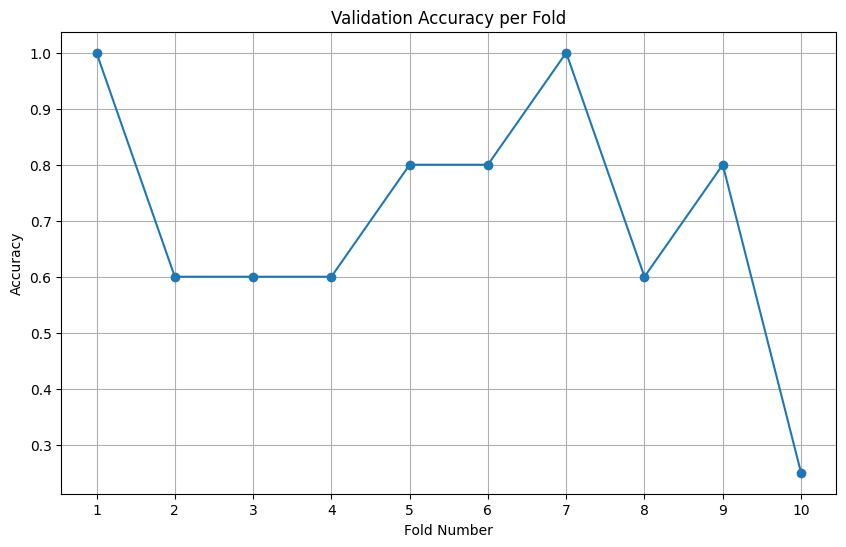

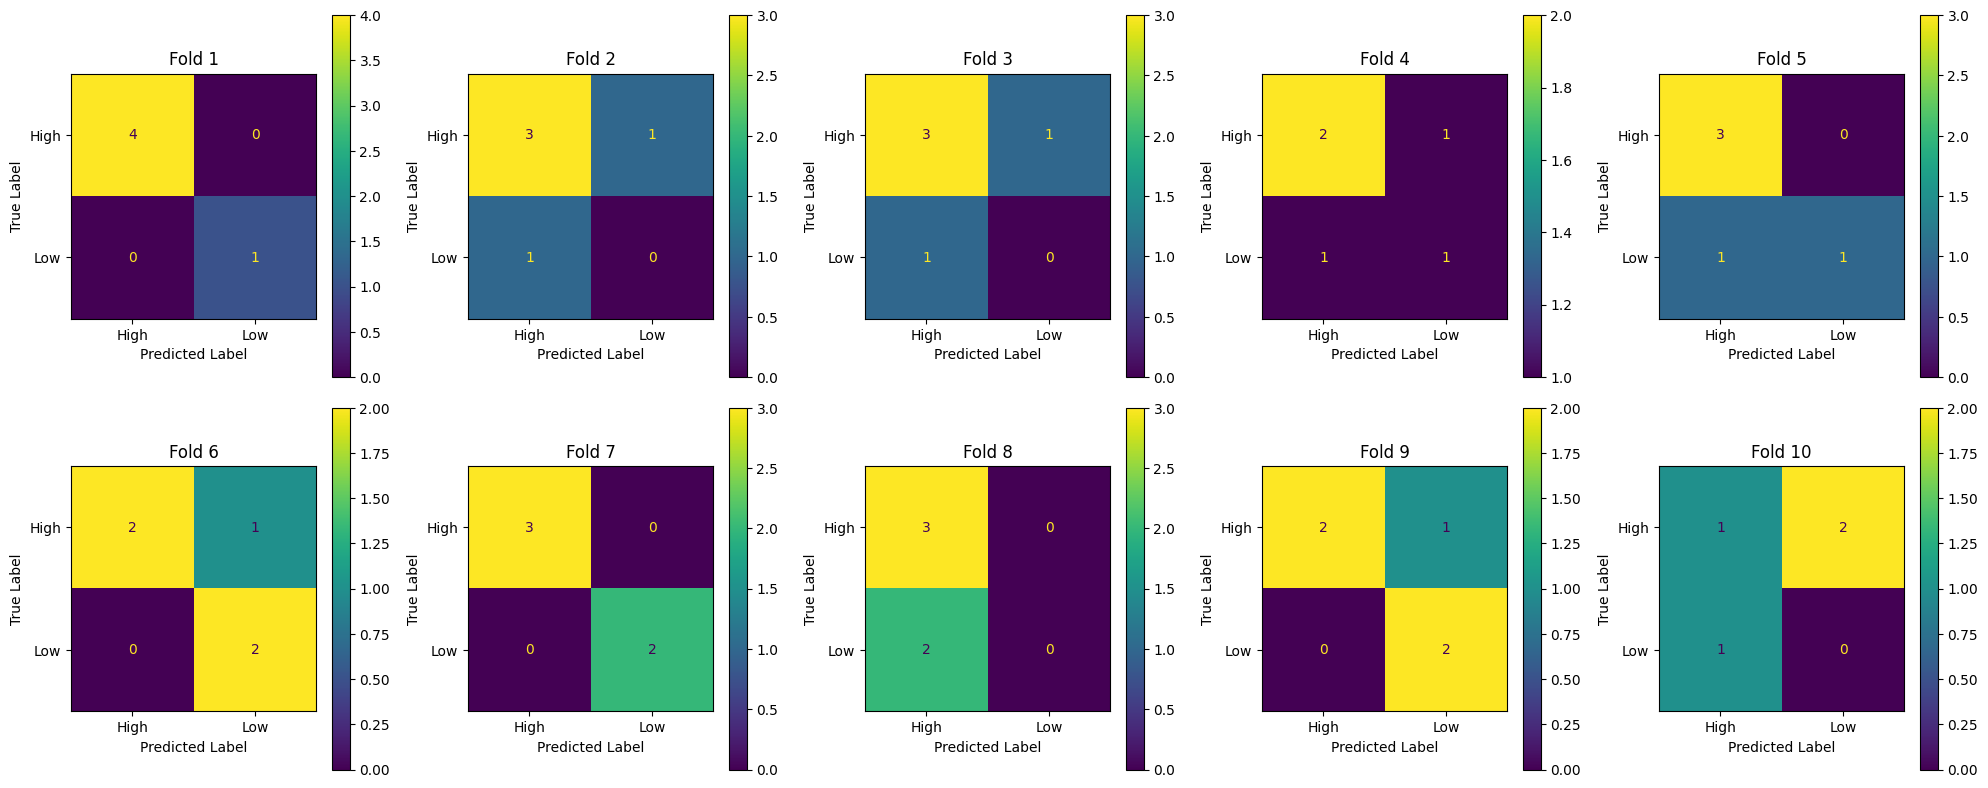

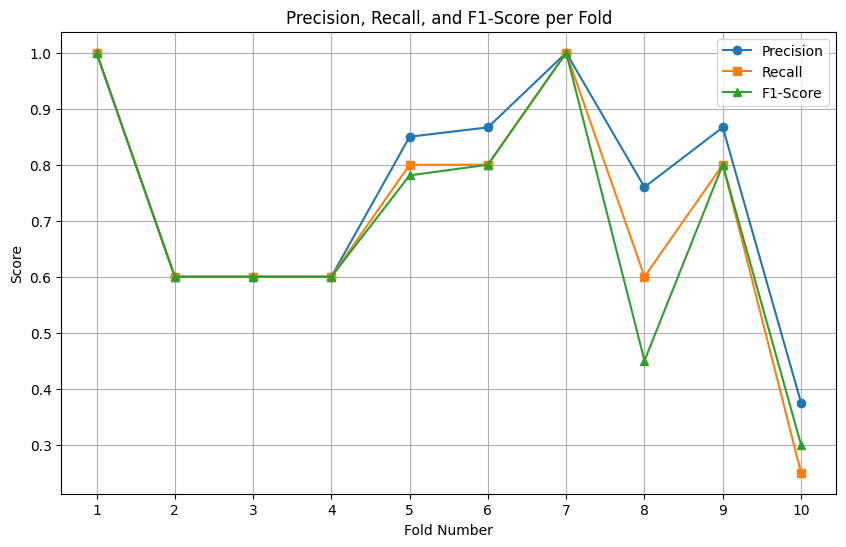

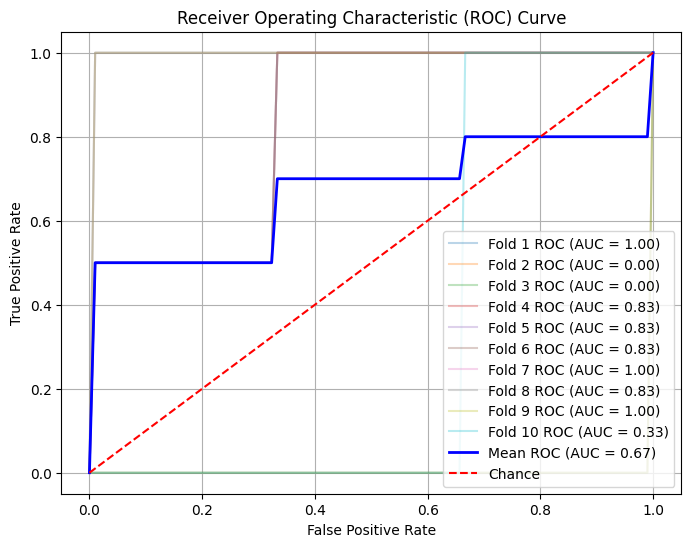

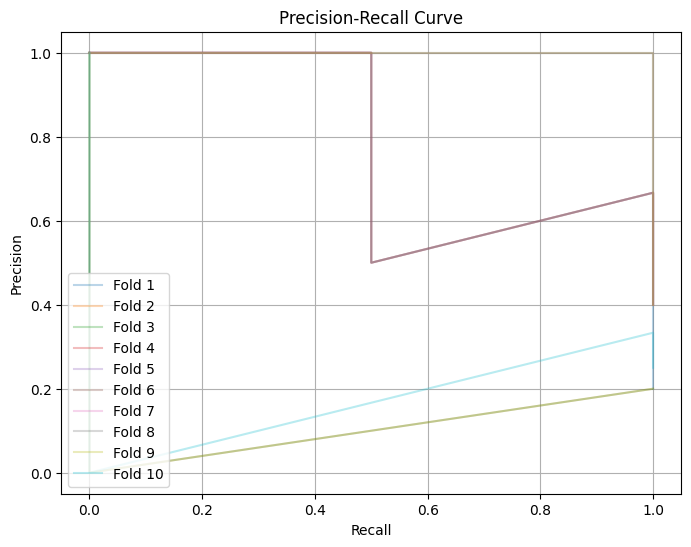

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
import joblib
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the training data
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
data = pd.read_csv(train_file_path)

# Features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Parameter grid for SVM
param_dist = {
    'model__C': [0.1, 1, 10, 50, 100, 1000],
    'model__kernel': ['linear', 'poly', 'rbf'],
    'model__gamma': ['scale', 'auto', 0.01, 0.001],
    'model__degree': [2, 3, 4],
    'model__class_weight': [None, 'balanced']
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold_results = []
best_fold_accuracy = 0
best_fold = None
best_model = None
fold_number = 1

# Initialize lists to collect metrics
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
confusion_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
precision_recall_data = []  # To store data for Precision-Recall curves

for train_index, val_index in skf.split(X, y):
    print(f"Fold {fold_number}")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Define the pipeline using imblearn's Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', SVC())
    ])

    # Set up RandomizedSearchCV with the pipeline
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        scoring='f1_weighted',
        n_iter=10,
        cv=3,
        n_jobs=-1,
        random_state=42
    )

    # Fit the RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)

    # Best model for this fold
    best_pipeline = random_search.best_estimator_
    best_params = random_search.best_params_

    # Training predictions and accuracy
    y_train_pred = best_pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Validation predictions and accuracy
    y_val_pred = best_pipeline.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Classification report
    report = classification_report(y_val, y_val_pred, target_names=['High', 'Low'], zero_division=1)
    print(f"Best Parameters: { {k.replace('model__', ''): v for k, v in best_params.items()} }")
    print(f"Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    print("Classification Report:\n", report)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    print(f"Confusion Matrix:\n{cm}\n")

    # Collect accuracy
    fold_accuracies.append(val_accuracy)

    # Collect precision, recall, f1-score
    report_dict = classification_report(y_val, y_val_pred, output_dict=True, zero_division=1)
    fold_precisions.append(report_dict['weighted avg']['precision'])
    fold_recalls.append(report_dict['weighted avg']['recall'])
    fold_f1s.append(report_dict['weighted avg']['f1-score'])

    # Collect confusion matrix
    confusion_matrices.append(cm)

    # Compute ROC curve and AUC for this fold
    if len(np.unique(y_val)) == 2:
        y_val_proba = best_pipeline.decision_function(X_val)
        # Ensure that y_val is properly encoded
        y_val_binary = (y_val == 'Low').astype(int)
        fpr, tpr, _ = roc_curve(y_val_binary, y_val_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # Interpolate to compute mean ROC
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

        # Store data for Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_val_binary, y_val_proba)
        precision_recall_data.append((precision, recall))
    else:
        # For folds where only one class is present in y_val
        print(f"Fold {fold_number} has only one class in y_val.")

    # Save results
    fold_results.append({
        'fold': fold_number,
        'val_accuracy': val_accuracy,
        'model': best_pipeline,
        'classification_report': report,
        'confusion_matrix': cm
    })

    # Update best fold
    if val_accuracy > best_fold_accuracy:
        best_fold_accuracy = val_accuracy
        best_fold = fold_number
        best_model = best_pipeline

    fold_number += 1

# Best fold results
print(f"Best Fold: Fold {best_fold} with Validation Accuracy: {best_fold_accuracy}")
print("Classification Report for Best Fold:\n", fold_results[best_fold - 1]['classification_report'])
print(f"Confusion Matrix for Best Fold:\n{fold_results[best_fold - 1]['confusion_matrix']}")

# Save the best model
model_path = '/content/drive/MyDrive/Research_Dysgraphia/svmfinal_best_pipeline.pkl'
joblib.dump(best_model, model_path)
print(f"\nModel saved to {model_path}")

# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, fold_number), fold_accuracies, marker='o')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, fold_number))
plt.grid(True)
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, cm in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High', 'Low'])
    disp.plot(ax=axes[i], values_format='d')
    axes[i].set_title(f'Fold {i+1}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Plot Precision, Recall, F1-Score per Fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, fold_number), fold_precisions, marker='o', label='Precision')
plt.plot(range(1, fold_number), fold_recalls, marker='s', label='Recall')
plt.plot(range(1, fold_number), fold_f1s, marker='^', label='F1-Score')
plt.title('Precision, Recall, and F1-Score per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.xticks(range(1, fold_number))
plt.legend()
plt.grid(True)
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i, tpr in enumerate(tprs):
    plt.plot(mean_fpr, tpr, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {aucs[i]:.2f})')

# Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, (precision, recall) in enumerate(precision_recall_data):
    plt.plot(recall, precision, alpha=0.3, label=f'Fold {i+1}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Gradeint Boosting


In [ ]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import numpy as np
import joblib
import warnings
import os

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the training data
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
data = pd.read_csv(train_file_path)

# Features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Parameter grid for XGBoost Classifier
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7, 9],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2, 5]  # Adjust for class imbalance
}

# Repeated Stratified K-Fold Cross-Validation
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

fold_results = []
best_fold_auc = 0
best_fold = None
best_model = None
fold_number = 1

for train_index, val_index in rskf.split(X, y_encoded):
    print(f"Fold {fold_number}")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Define the pipeline using imblearn's Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ])

    # Set up RandomizedSearchCV with the pipeline
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        scoring='roc_auc',
        n_iter=20,  # Increased number of iterations
        cv=3,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    # Fit the RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)

    # Best model for this fold
    best_pipeline = random_search.best_estimator_
    best_params = random_search.best_params_

    # Training predictions and accuracy
    y_train_pred = best_pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Validation predictions and accuracy
    y_val_pred = best_pipeline.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    y_val_prob = best_pipeline.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_prob)

    # Classification report
    report = classification_report(y_val, y_val_pred, zero_division=1)
    print(f"Best Parameters: { {k.replace('model__', ''): v for k, v in best_params.items()} }")
    print(f"Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation AUC: {val_auc:.4f}")
    print("Classification Report:\n", report)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    print(f"Confusion Matrix:\n{cm}\n")

    # Save results
    fold_results.append({
        'fold': fold_number,
        'val_accuracy': val_accuracy,
        'val_auc': val_auc,
        'model': best_pipeline,
        'classification_report': report,
        'confusion_matrix': cm
    })

    # Save the model for this fold
    model_path = f'/content/drive/MyDrive/Research_Dysgraphia/xgb_pipeline_fold{fold_number}.pkl'
    joblib.dump(best_pipeline, model_path)
    print(f"Model for Fold {fold_number} saved to {model_path}\n")

    # Update best fold based on AUC
    if val_auc > best_fold_auc:
        best_fold_auc = val_auc
        best_fold = fold_number
        best_model = best_pipeline

    fold_number += 1

# Best fold results
print(f"Best Fold: Fold {best_fold} with Validation AUC: {best_fold_auc:.4f}")
print("Classification Report for Best Fold:\n", fold_results[best_fold - 1]['classification_report'])
print(f"Confusion Matrix for Best Fold:\n{fold_results[best_fold - 1]['confusion_matrix']}")

# Save the best model
best_model_path = '/content/drive/MyDrive/Research_Dysgraphia/xgb_best_pipeline.pkl'
joblib.dump(best_model, best_model_path)
print(f"\nBest model saved to {best_model_path}")


Fold 1
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Training Accuracy: 1.0000, Validation Accuracy: 0.8000, Validation AUC: 0.6190
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10

Confusion Matrix:
[[7 0]
 [2 1]]

Model for Fold 1 saved to /content/drive/MyDrive/Research_Dysgraphia/xgb_pipeline_fold1.pkl

Fold 2
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 2, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
Training Accuracy: 1.0000, Validation Accuracy: 0.8000, Validation AUC: 0.8095
Classification Report:
           

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load testing dataset
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'
test_data = pd.read_csv(test_file_path)

# Assume the last column is the target variable, and the rest are features
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target (string labels)

# Manually encode the target labels
label_mapping = {'High': 0, 'Low': 1}
y_test_encoded = y_test.map(label_mapping)

# Load the trained pipeline (for example, model from fold 1)
pipeline = joblib.load('/content/drive/MyDrive/Research_Dysgraphia/xgb_pipeline_fold4.pkl')

# Make predictions on the testing set using the pipeline
y_test_pred_encoded = pipeline.predict(X_test)

# Evaluate the model on testing set using the encoded labels
print("Accuracy on Test Set:", accuracy_score(y_test_encoded, y_test_pred_encoded))
print("Classification Report on Test Set:\n", classification_report(y_test_encoded, y_test_pred_encoded, zero_division=1))

# If you want to see the classification report with original labels
# First, create the inverse mapping
inverse_label_mapping = {0: 'High', 1: 'Low'}
y_test_pred = [inverse_label_mapping[label] for label in y_test_pred_encoded]

print("Classification Report on Test Set (Original Labels):\n", classification_report(y_test, y_test_pred, zero_division=1))


Accuracy on Test Set: 0.6923076923076923
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.41      0.41      0.41        13
weighted avg       0.69      0.69      0.69        13

Classification Report on Test Set (Original Labels):
               precision    recall  f1-score   support

        High       0.82      0.82      0.82        11
         Low       0.00      0.00      0.00         2

    accuracy                           0.69        13
   macro avg       0.41      0.41      0.41        13
weighted avg       0.69      0.69      0.69        13



# Multi Layer Perceptron

## Using SMOTE Inside Each Cross-Validation Fold


Training Dataset


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define cross-validator and hyperparameter grid for MLPClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(10,), (30,), (30, 10)],  # Smaller architectures
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Stronger regularization values
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200],
}


# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, early_stopping=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Lists to store results
metrics_list = []

# Perform cross-validation
fold = 0
for train_index, test_index in skf.split(X_scaled, y):
    fold += 1
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Apply ADASYN (SMOTE alternative) on each fold training data
    smote = ADASYN(sampling_strategy='auto', random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Perform grid search to find the best hyperparameters
    grid_search.fit(X_train_fold_smote, y_train_fold_smote)

    # Train the classifier with the best hyperparameters found
    best_classifier = grid_search.best_estimator_

    # Predict on the training fold (training accuracy)
    y_train_pred = best_classifier.predict(X_train_fold_smote)

    # Calculate training accuracy and other metrics
    accuracy_train = accuracy_score(y_train_fold_smote, y_train_pred)
    report_train = classification_report(y_train_fold_smote, y_train_pred, target_names=['High', 'Low'], output_dict=True)

    # Store metrics for each fold
    metrics = {
        'Fold': fold,
        'Training Accuracy': accuracy_train,
        'High Precision': report_train['High']['precision'],
        'High Recall': report_train['High']['recall'],
        'High F1': report_train['High']['f1-score'],
        'Low Precision': report_train['Low']['precision'],
        'Low Recall': report_train['Low']['recall'],
        'Low F1': report_train['Low']['f1-score'],
    }
    metrics_list.append(metrics)

    # Print training metrics for the current fold
    print(f"Training Metrics for Fold {fold}:")
    print(pd.DataFrame([metrics]))

    # Print the best hyperparameters for the current fold
    print(f"Best hyperparameters for Fold {fold}: {grid_search.best_params_}")

# Summarize training metrics across all folds
all_metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of Training Metrics Across All Folds:")
print(all_metrics_df.mean())


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training Metrics for Fold 1:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     1                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 1: {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (30, 10), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Metrics for Fold 2:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     2                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 2: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Metrics for Fold 3:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     3                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 3: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training Metrics for Fold 4:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     4                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 4: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
Training Metrics for Fold 5:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     5                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 5: {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}

Summary of Training Metrics Across All Folds:
Fold                 3.0
Training Accuracy    1.0
High Precision       1.0
High Recall          1.0
High F1              1.0
Low Precisio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Step 1: Split the data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply ADASYN (SMOTE alternative) to the training data only
smote = ADASYN(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Define cross-validator and hyperparameter grid for MLPClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],  # Reduce model complexity
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'lbfgs'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Increase regularization values
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies
    'max_iter': [100, 200, 300],  # Reduce the maximum number of iterations
}

# Initialize the MLP classifier with early stopping
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, early_stopping=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Step 5: Perform grid search cross-validation on the training set with SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# Step 6: After cross-validation, get the best model
best_classifier = grid_search.best_estimator_

# Step 7: Evaluate the best model on the unseen test data
y_test_pred = best_classifier.predict(X_test_scaled)

# Calculate accuracy and other metrics on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred, target_names=['High', 'Low'])

# Print the final test accuracy and classification report
print(f"\nTest Accuracy on the unseen test data: {accuracy_test}")
print("Classification Report on the test data:")
print(report_test)



Test Accuracy on the unseen test data: 0.8461538461538461
Classification Report on the test data:
              precision    recall  f1-score   support

        High       0.82      1.00      0.90         9
         Low       1.00      0.50      0.67         4

    accuracy                           0.85        13
   macro avg       0.91      0.75      0.78        13
weighted avg       0.87      0.85      0.83        13



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Applying SMOTE Before Cross-Validation


Train the model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features for both training and test sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training set (not the test set)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Option 1: Use cross-validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', random_state=42)

# Lists to store results
metrics_list = []

# Perform cross-validation on the training data (with SMOTE)
fold = 0
for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    fold += 1
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[test_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[test_index]

    # Train classifier on the training fold
    classifier.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_val = classifier.predict(X_val_fold)

    # Calculate metrics on the validation fold
    accuracy = accuracy_score(y_val_fold, y_pred_val)
    report = classification_report(y_val_fold, y_pred_val, target_names=['High', 'Low'], output_dict=True)

    # Store metrics for each fold
    metrics = {
        'Fold': fold,
        'Overall Accuracy': accuracy,
        'High Precision': report['High']['precision'],
        'High Recall': report['High']['recall'],
        'High F1': report['High']['f1-score'],
        'Low Precision': report['Low']['precision'],
        'Low Recall': report['Low']['recall'],
        'Low F1': report['Low']['f1-score'],
    }
    metrics_list.append(metrics)

    # Print metrics for current fold
    print(f"Metrics for Fold {fold}:")
    print(pd.DataFrame([metrics]))

# Summarize all folds metrics
all_metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of Metrics Across All Folds (Cross-Validation on Training Set):")
print(all_metrics_df.mean())

# --- Final evaluation on the unseen test data (20% test set) ---
# Train the classifier on the entire training set (with SMOTE)
classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_test = classifier.predict(X_test_scaled)

# Calculate metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=['High', 'Low'])

# Print the final metrics for the test set
print(f"\nAccuracy on test data (unseen 20%): {accuracy_test}")
print("Classification Report on test data:")
print(report_test)


Metrics for Fold 1:
   Fold  Overall Accuracy  High Precision  High Recall  High F1  \
0     1               1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Metrics for Fold 2:
   Fold  Overall Accuracy  High Precision  High Recall   High F1  \
0     2          0.941176             1.0     0.888889  0.941176   

   Low Precision  Low Recall    Low F1  
0       0.888889         1.0  0.941176  
Metrics for Fold 3:
   Fold  Overall Accuracy  High Precision  High Recall  High F1  \
0     3               1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Metrics for Fold 4:
   Fold  Overall Accuracy  High Precision  High Recall  High F1  \
0     4               1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Metrics for Fold 5:
   Fold  Overall Accuracy  High Precision 

Test data



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)  # Features
y = data['severity']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Important to use the same scaler for the test set

# Apply SMOTE to the training set (not the test set)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train the MLPClassifier on the SMOTE-applied training set
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', random_state=42)
classifier.fit(X_train_smote, y_train_smote)

# Predict on the test data (20% unseen data)
y_pred_test = classifier.predict(X_test_scaled)

# Calculate accuracy and other metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=['High', 'Low'])

# Output the results for the test set
print(f"Accuracy on the test data (unseen 20%): {accuracy_test}")
print("Classification Report on the test data:")
print(report_test)


Accuracy on the test data (unseen 20%): 0.9230769230769231
Classification Report on the test data:
              precision    recall  f1-score   support

        High       0.92      1.00      0.96        11
         Low       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define cross-validator and hyperparameter grid for RandomForestClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Lists to store results
metrics_list = []

# Perform cross-validation
fold = 0
for train_index, test_index in skf.split(X_scaled, y):
    fold += 1
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Apply ADASYN (SMOTE alternative) on each fold training data
    smote = ADASYN(sampling_strategy='auto', random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Perform grid search to find the best hyperparameters
    grid_search.fit(X_train_fold_smote, y_train_fold_smote)

    # Train the classifier with the best hyperparameters found
    best_classifier = grid_search.best_estimator_

    # Predict on the training fold (training accuracy)
    y_train_pred = best_classifier.predict(X_train_fold_smote)

    # Calculate training accuracy and other metrics
    accuracy_train = accuracy_score(y_train_fold_smote, y_train_pred)
    report_train = classification_report(y_train_fold_smote, y_train_pred, target_names=['High', 'Low'], output_dict=True)

    # Store metrics for each fold
    metrics = {
        'Fold': fold,
        'Training Accuracy': accuracy_train,
        'High Precision': report_train['High']['precision'],
        'High Recall': report_train['High']['recall'],
        'High F1': report_train['High']['f1-score'],
        'Low Precision': report_train['Low']['precision'],
        'Low Recall': report_train['Low']['recall'],
        'Low F1': report_train['Low']['f1-score'],
    }
    metrics_list.append(metrics)

    # Print training metrics for the current fold
    print(f"Training Metrics for Fold {fold}:")
    print(pd.DataFrame([metrics]))

    # Print the best hyperparameters for the current fold
    print(f"Best hyperparameters for Fold {fold}: {grid_search.best_params_}")

# Summarize training metrics across all folds
all_metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of Training Metrics Across All Folds:")
print(all_metrics_df.mean())


Training Metrics for Fold 1:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     1                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 1: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Metrics for Fold 2:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     2                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 2: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training Metrics for Fold 3:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     3                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0   